## 2nd set: Segmentation exercises - S1c y S1d
### IPAC - 2021
#### Allison Fernández Lobo - MUSS Program

In [1]:
# Import the libraries.
import cv2  
import numpy as np  
import random
import matplotlib.pyplot as plt

### S1c. Number of teeth from a gear wheel.

The wheel has 855 pixels in the teeth.


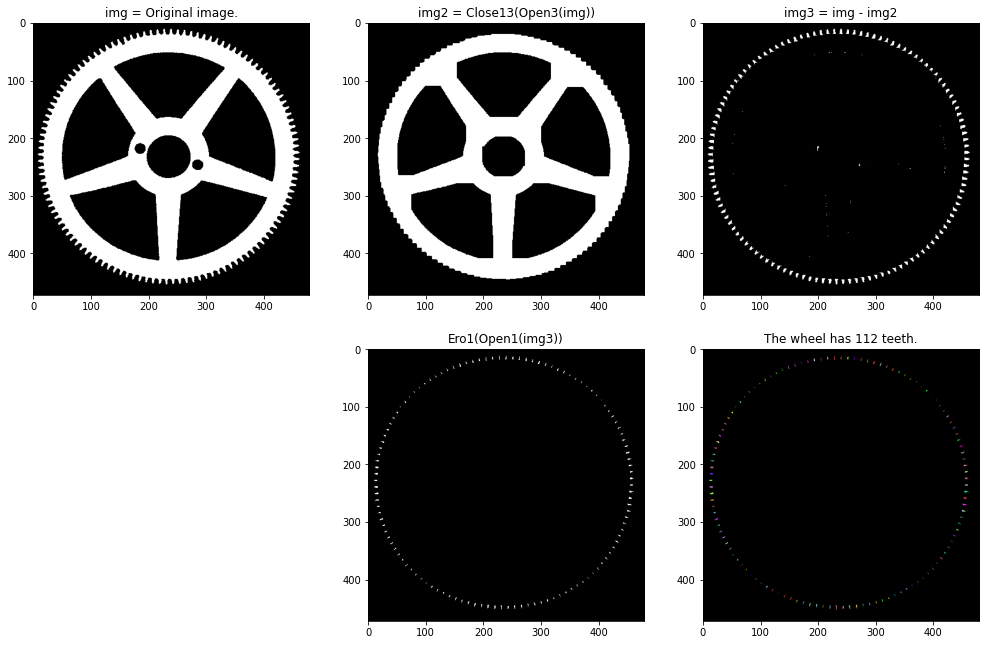

In [202]:
# Read the input image.
img = cv2.imread(r'./Input Images/wheel.png', 0)  

# Define the kernel.
kernel = np.ones((3,3), np.uint8)  

def GrassAlgorithm(image, conn):
    pixels = 0
    # Threshold operation for the black pixels.
    _, imageTh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    # Gray Image to Color Image.
    out = cv2.cvtColor(imageTh, cv2.COLOR_GRAY2BGR)
    height, width = imageTh.shape
    # In order to manage the borders, the mask is +2 pixels bigger in each side. 
    mask = np.zeros((height+2, width+2), np.uint8)
    for i in range(height):
        for j in range(width):
            if(imageTh[i,j] == 255):
                pixels = pixels + 1
                # Generate random color for the region.
                r = random.randint(0,255)
                g = random.randint(0,255)
                b = random.randint(0,255)
                # Identify the connections and assign the random color.
                cv2.floodFill(out, mask, (j,i), (b,g,r), flags = conn)
    return out, pixels

# This function count the number of different colors in the output image and int his way obtain the number of zones
# since that for each zone a different color is assign in the Grassfire Algorithm.
def Zones(img):
    height, width, canals = img.shape
    colors = []; a= 0
    for i in range(height):
        for j in range(width):
            if img[i,j][2] in colors:
                a = a + 1
            else:
                colors.append(img[i,j][2])
    return len(colors)

# Operations.
img2 = cv2.morphologyEx(cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=3),cv2.MORPH_CLOSE, kernel, iterations=13)
img3 = img - img2
img4 = cv2.erode(cv2.morphologyEx(img3, cv2.MORPH_OPEN,kernel, iterations=1),kernel, iterations=1)

grass = GrassAlgorithm(img4, 4)

plt.figure(figsize=(17,17))
plt.subplot(3,3,1)
plt.title("img = Original image.")
plt.imshow(img,cmap = 'gray');

plt.subplot(3,3,2)
plt.title("img2 = Close13(Open3(img))")
plt.imshow(img2,cmap = 'gray')

plt.subplot(3,3,3)
plt.title("img3 = img - img2")
plt.imshow(img3,cmap = 'gray')

plt.subplot(3,3,5)
plt.title("Ero1(Open1(img3))")
plt.imshow(img4,cmap = 'gray')

a = Zones(grass[0]) - 1
plt.subplot(3,3,6)
plt.title("The wheel has "+ str(a) + " teeth.")
plt.imshow(grass[0],cmap = 'gray')

print("The wheel has "+ str(grass[1]) + " pixels in the teeth.")
plt.savefig('./Output Images/S1c Wheel.png')

### S1d. Obtaining markers for coffee_grains image automatically